<a href="https://colab.research.google.com/github/williamvalenciaK/SQLServerPIT/blob/main/Clases/2_Sesi%C3%B3n_3_FUNCIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table width='99%'>
<tr>
<td bgcolor='#52008E'>

# **<font color="#FFFFFF"> ◉ FUNCIONES</font>**

</td>
</tr>
</table>

Las funciones son objetos de base de datos que permiten la reutilización de código en consultas y procedimientos almacenados.

Las funciones pueden ser definidas por el usuario o pueden ser funciones integradas proporcionadas por SQL Server.

Las funciones definidas por el usuario son funciones personalizadas que los usuarios pueden crear para realizar tareas específicas.

Estas funciones se pueden utilizar en una consulta o en un procedimiento almacenado de la misma manera que se utiliza una función integrada.

Las funciones del sistema son funciones predefinidas que están disponibles en SQL Server y se utilizan para realizar tareas comunes.

Algunos ejemplos de funciones integradas en SQL Server incluyen funciones matemáticas como ABS() y funciones de fecha y hora como GETDATE().

Existen varios tipos de funciones en SQL Server, incluyendo funciones escalares, funciones con valores de tabla insertados y funciones de valor de tabla de múltiples instrucciones.

Las funciones escalares devuelven un solo valor, mientras que las funciones con valores de tabla devuelven un conjunto de filas.

Las funciones con valores de tabla se utilizan para devolver un conjunto de valores que se pueden utilizar en una consulta.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Funciones del sistema</font>**

</td>
</tr>
</table>

Las funciones del sistema en SQL Server 2022 son una colección de funciones predefinidas que permiten a los usuarios realizar diversas tareas y operaciones dentro de una base de datos.

>* **Funciones de cadena de caracteres**: Permiten manipular y trabajar con cadenas de texto, como CONCAT(), SUBSTRING(), REPLACE(), TRIM(), entre otras.




```
SELECT CONCAT('PI = ', PI())
GO
SELECT SUBSTRING('UNIVERSIDAD NACIONAL DE INGENIERÍA',1,3)
USE pvl
GO
UPDATE Beneficiario
SET pat_ben_vc = REPLACE(pat_ben_vc, 'Ð', 'Ñ')
GO
UPDATE Beneficiario
SET mat_ben_vc = REPLACE(mat_ben_vc, 'Ð', 'Ñ')
GO
UPDATE Beneficiario
SET nom_ben_vc = REPLACE(nom_ben_vc, 'Ð', 'Ñ')
GO
SELECT * FROM Beneficiario
WHERE pat_ben_vc LIKE '%Ñ%'
	OR
	mat_ben_vc LIKE '%Ñ%'
	OR
	nom_ben_vc LIKE '%Ñ%'
GO
```



>* **Funciones numéricas**: Proporcionan operaciones matemáticas y funciones para trabajar con datos numéricos, como ABS(), ROUND(), SQRT(), POWER(), etc.




```
-- Funciones matemáticas
SELECT Pi(), Round(Pi(), 2)
SELECT Sqrt(2)
SELECT Power(2, 3)
GO
```



>* **Funciones de fecha y hora**: Permiten trabajar con fechas, horas y tiempos, como GETDATE(), DATEPART(), DATEDIFF(), YEAR(), MONTH(), DAY().



```
SELECT GETDATE()

SELECT DATEPART(MONTH, GETDATE())
SELECT DATEPART(MONTH, GETDATE())
SELECT MONTH(GETDATE())

SELECT DATEPART(DAY, GETDATE())
SELECT DAY(GETDATE())
SELECT DATENAME(WEEKDAY, GETDATE())

SELECT YEAR(GETDATE())


```



>* **Funciones de conversión de datos**: Ayudan a convertir datos entre diferentes tipos de datos, como CAST(), CONVERT().



```
SELECT CONVERT(DECIMAL(12,5), PI())
SELECT CAST(PI() AS DECIMAL(12,5))

SELECT GETDATE() AS Fecha
SELECT CONVERT(char(10), GETDATE(), 103)
SELECT CONVERT(char(8), GETDATE(), 108)
SELECT CONVERT(char(12), GETDATE(), 114)
```



>* **Funciones de agregación**: Se utilizan para realizar cálculos sobre un grupo de filas, como SUM(), AVG(), COUNT(), MIN(), MAX().



```
USE Northwind
GO
SELECT CONVERT(DECIMAL(19,2),SUM(Quantity*UnitPrice*(1-Discount))) AS Monto
FROM [Order Details]
```



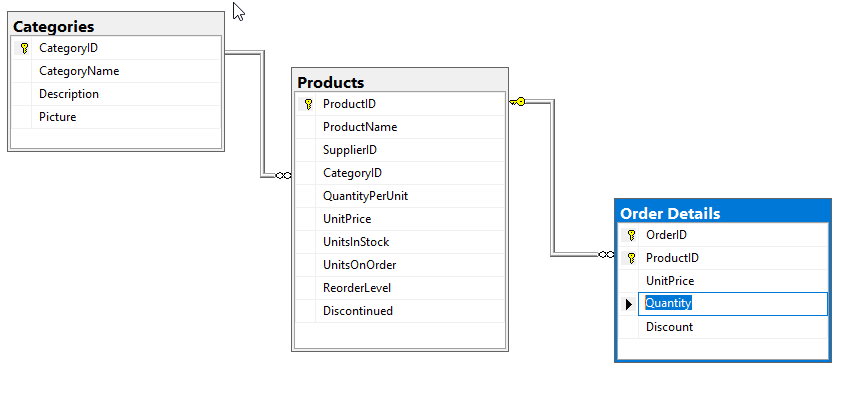



```
-- Promedio de ventas por categoría
USE Northwind
GO
SELECT
	c.CategoryName,
	CONVERT(DECIMAL(19,2),AVG(od.Quantity*od.UnitPrice*(1-od.Discount))) AS [Promedio de ventas por categoría]
FROM Categories c
INNER JOIN Products p
ON c.CategoryID = p.CategoryID
INNER JOIN [Order Details] od
ON p.ProductID=od.ProductID
GROUP BY c.CategoryName
```



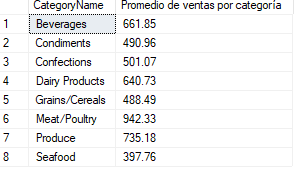



```
USE Northwind
GO
SELECT
	c.CategoryName,
	COUNT(*) AS Cantidad
FROM Categories c
INNER JOIN Products p
ON c.CategoryID = p.CategoryID
INNER JOIN [Order Details] od
ON p.ProductID=od.ProductID
GROUP BY c.CategoryName
ORDER BY 2 DESC
GO
```



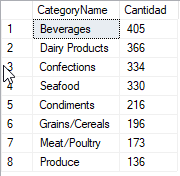





```
USE Northwind
GO
SELECT
	COUNT(*) AS Cantidad
FROM [Order Details]
GO
```



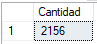

>* **Funciones de sistema**: Proporcionan información sobre el sistema y el entorno de SQL Server, como @@VERSION, USER_NAME(), DB_NAME().



```
SELECT @@VERSION
SELECT USER_NAME()
SELECT DB_NAME()
```



>* **Funciones de partición y ventana**: Permiten realizar operaciones de agrupación y partición de datos, como OVER(), PARTITION BY, RANK(), DENSE_RANK().



```
USE Northwind
GO
SELECT
	e.lastname,
	o.OrderDate,
	od.quantity,
	od.unitprice,
	od.discount,
	od.Quantity*od.UnitPrice*(1-od.Discount) AS SubTotal,
    SUM(od.Quantity*od.UnitPrice*(1-od.Discount))
	OVER (PARTITION BY e.EmployeeID ORDER BY o.OrderDate) AS Total
FROM Employees e
INNER JOIN Orders o
ON e.EmployeeID=o.EmployeeID
INNER JOIN [Order Details] od
ON o.OrderID=od.OrderID
ORDER BY e.EmployeeID, o.OrderDate
```



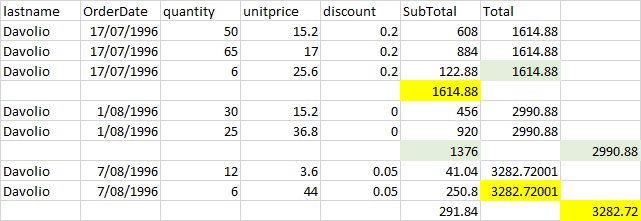

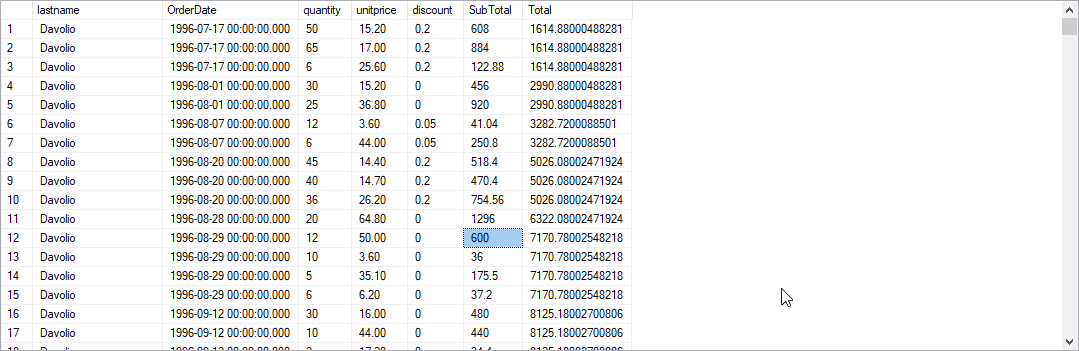



```
-- Calcular el ranking de las ventas por categoría de producto
USE Northwind
GO
SELECT
	p.ProductName,
    c.CategoryName,
	od.Quantity,
	od.UnitPrice,
	od.Discount,
	RANK() OVER (PARTITION BY c.CategoryName ORDER BY SUM(od.Quantity*od.UnitPrice*(1-od.Discount)) DESC) AS RankProducto
FROM Categories c
INNER JOIN Products p
ON c.CategoryID = p.CategoryID
INNER JOIN [Order Details] od
ON p.ProductID=od.ProductID
GROUP BY c.CategoryName, p.ProductName, od.Quantity, od.UnitPrice, od.Discount
ORDER BY c.CategoryName, RankProducto
```



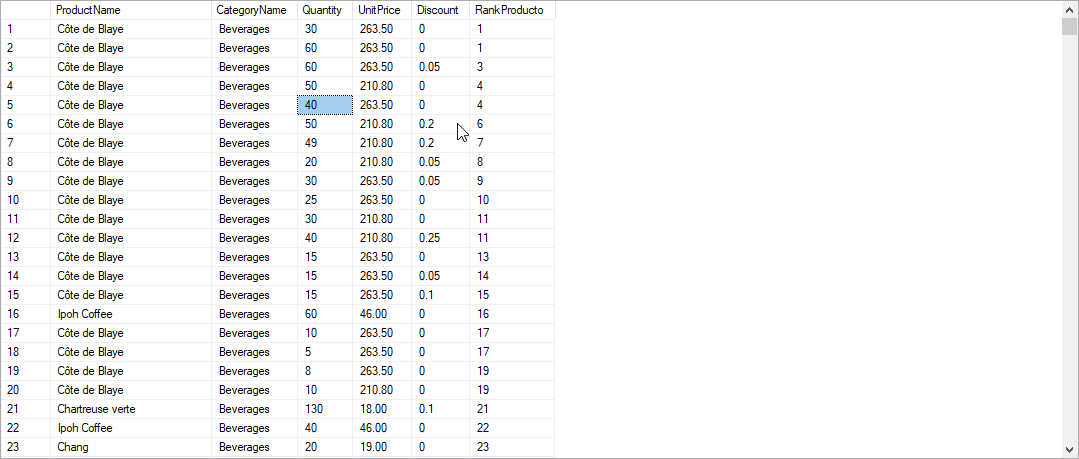



```
-- Calcular el ranking de ventas por empleado
USE Northwind
GO
SELECT
    e.lastname AS Apellido,
    SUM(od.Quantity*od.UnitPrice*(1-od.Discount)) AS Total,
    RANK() OVER (ORDER BY SUM(od.Quantity*od.UnitPrice*(1-od.Discount)) DESC) AS RankVentas
FROM Employees e
INNER JOIN Orders o
ON e.EmployeeID=o.EmployeeID
INNER JOIN [Order Details] od
ON o.OrderID=od.OrderID
GROUP BY e.lastname
ORDER BY RankVentas
```



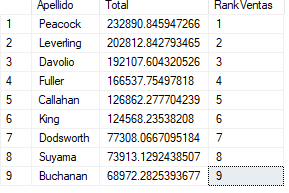



```
-- Calcular el ranking de las ventas por categoría de producto
USE Northwind
GO
SELECT
	c.CategoryName,
    p.ProductName,
    DENSE_RANK() OVER
	(
		PARTITION BY c.CategoryName
		ORDER BY SUM(od.Quantity*od.UnitPrice*(1-od.Discount)) DESC
	) AS RankCategoría
FROM Categories c
INNER JOIN Products p
ON c.CategoryID = p.CategoryID
INNER JOIN [Order Details] od
ON p.ProductID=od.ProductID
GROUP BY c.CategoryName, p.ProductName
ORDER BY c.CategoryName, RankCategoría
GO

```



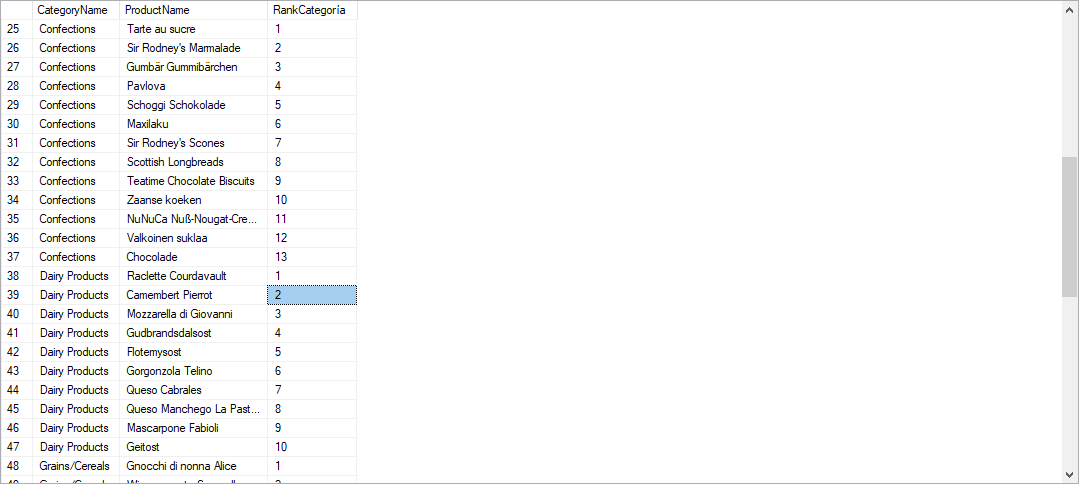

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> ◉ Funciones creadas por el usuario</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ Funciones escalares </font>**

</td>
</tr>
</table>

Las funciones escalares creadas por el usuario son aquellas que devuelven un solo tipo de dato de SQL Server.

**Creación de una función escalar que devuelve el nombre de la categoría**



```
-- ================================================
-- Template generated from Template Explorer using:
-- Create Scalar Function (New Menu).SQL
--
-- Use the Specify Values for Template Parameters
-- command (Ctrl-Shift-M) to fill in the parameter
-- values below.
--
-- This block of comments will not be included in
-- the definition of the function.
-- ================================================
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
-- =============================================
-- Author:		Edgard Lucho
-- Create date: 07/08/2024
-- Description:	Devuelve la categoría del producto
-- =============================================
ALTER FUNCTION ufn_categoria
(
	-- Add the parameters for the function here
	@CategoryID int
)
RETURNS NVARCHAR(15)
AS
BEGIN
	-- Declare the return variable here
	DECLARE @Result VARCHAR(15)

	-- Add the T-SQL statements to compute the return value here
	SELECT @Result = CategoryName
	FROM Categories
	WHERE CategoryID=@CategoryID

	-- Return the result of the function
	RETURN @Result

END
GO
USE [Northwind]
GO

SELECT [ProductID]
      ,[ProductName]
      ,[SupplierID]
      ,[CategoryID]
	  ,dbo.[ufn_categoria]([CategoryID]) AS Categoría
      ,[QuantityPerUnit]
      ,[UnitPrice]
      ,[UnitsInStock]
      ,[UnitsOnOrder]
      ,[ReorderLevel]
      ,[Discontinued]
  FROM [dbo].[Products]

GO
```



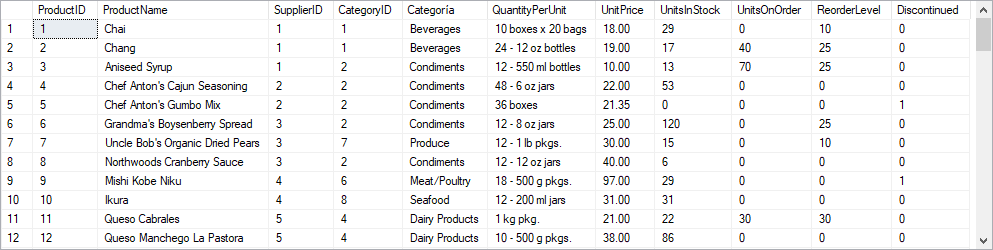



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sysobjects
	WHERE
			xtype = 'fn'
		AND
			name = 'ufn_categoria'
)
DROP FUNCTION ufn_categoria
GO
-- ================================================
-- Template generated from Template Explorer using:
-- Create Scalar Function (New Menu).SQL
--
-- Use the Specify Values for Template Parameters
-- command (Ctrl-Shift-M) to fill in the parameter
-- values below.
--
-- This block of comments will not be included in
-- the definition of the function.
-- ================================================
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
-- =============================================
--      Author: Edgard Lucho
-- Create date: 07/08/2024
-- Description: Devuelve la categoría del producto
-- =============================================
CREATE FUNCTION ufn_categoria
(
    @CategoryID int
)
RETURNS NVARCHAR(15)
AS
BEGIN
    DECLARE @CategoryName NVARCHAR(15)

    SELECT @CategoryName = CategoryName
    FROM Categories
    WHERE CategoryID=@CategoryID

    RETURN @CategoryName

END
--************************
--* Prueba de la función *
--************************
GO
SELECT [ProductID]
      ,[ProductName]
      ,[SupplierID]
      --,[CategoryID]
      ,dbo.[ufn_categoria]([CategoryID]) AS Categoría
      ,[QuantityPerUnit]
      ,[UnitPrice]
      ,[UnitsInStock]
      ,[UnitsOnOrder]
      ,[ReorderLevel]
      ,[Discontinued]
  FROM [dbo].[Products]
GO
```



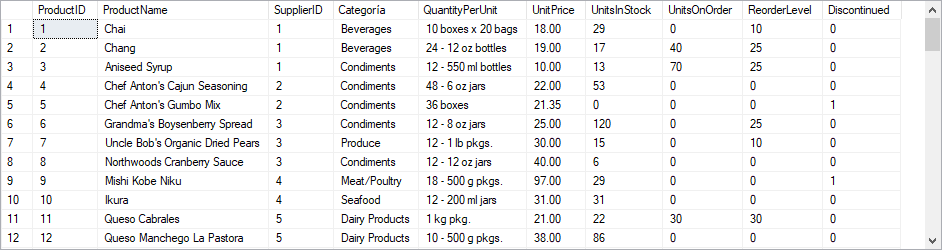



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sysobjects
	WHERE
			xtype = 'fn'
		AND
			name = 'ufn_proveedor'
)
DROP FUNCTION ufn_proveedor
GO
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
-- =============================================
--      Author: Edgard Lucho
-- Create date: 07/08/2024
-- Description: Devuelve el proveedor del producto
-- =============================================
CREATE FUNCTION ufn_proveedor
(
    @SupplierID int
)
RETURNS NVARCHAR(40)
AS
BEGIN
    DECLARE @CompanyName NVARCHAR(40)

    SELECT @CompanyName = CompanyName
    FROM Suppliers
    WHERE SupplierID = @SupplierID

    RETURN @CompanyName

END
GO
--************************
--* Prueba de la función *
--************************
SELECT [ProductID]
      ,[ProductName]
      ,dbo.ufn_proveedor([SupplierID]) AS Proveedor
      ,dbo.[ufn_categoria]([CategoryID]) AS Categoría
      ,[QuantityPerUnit]
      ,[UnitPrice]
      ,[UnitsInStock]
      ,[UnitsOnOrder]
      ,[ReorderLevel]
      ,[Discontinued]
  FROM [dbo].[Products]
GO
```



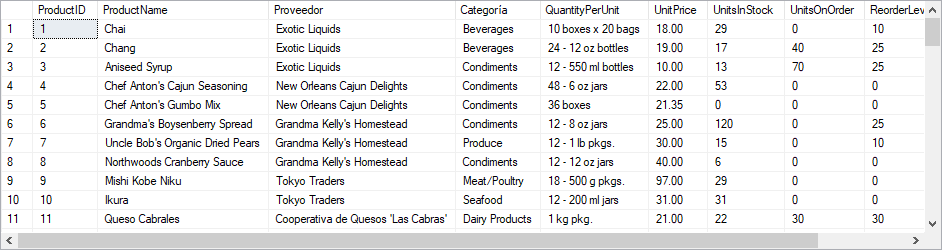



```
USE Northwind
/*
	Crear una función escalar que permita ingresar un número entero
	entre 1 y 3999 y devuelva dicho número en número romano.
*/
GO
IF EXISTS
(
	SELECT name
	FROM sysobjects
	WHERE
			xtype = 'fn'
		AND
			name = 'ufn_convercion_numero_a_numero_romano'
)
DROP FUNCTION ufn_convercion_numero_a_numero_romano
GO
CREATE FUNCTION ufn_convercion_numero_a_numero_romano
(
	@n INT
)
RETURNS NVARCHAR(200)
BEGIN
	DECLARE @rom NVARCHAR(200) = '';

	IF @n >= 1 AND @n <= 3999
	BEGIN
		DECLARE @m INT, @c INT, @d INT, @u INT;

		SET @m = @n / 1000;
		SET @n %= 1000;

		SET @c = @n / 100;
		SET @n %= 100;

		SET @d = @n / 10;
		SET @u = @n % 10;

		SELECT @rom =
			CASE @m
				WHEN 1 THEN 'M'
				WHEN 2 THEN 'MM'
				WHEN 3 THEN 'MMM'
				ELSE ''
			END

		SELECT @rom +=
			CASE @c
				WHEN 1 THEN 'C'
				WHEN 2 THEN 'CC'
				WHEN 3 THEN 'CCC'
				WHEN 4 THEN 'CD'
				WHEN 5 THEN 'D'
				WHEN 6 THEN 'DC'
				WHEN 7 THEN 'DCC'
				WHEN 8 THEN 'DCCC'
				WHEN 9 THEN 'CM'
				ELSE ''
			END
		SELECT @rom +=
			CASE @d
				WHEN 1 THEN 'X'
				WHEN 2 THEN 'XX'
				WHEN 3 THEN 'XXX'
				WHEN 4 THEN 'XL'
				WHEN 5 THEN 'L'
				WHEN 6 THEN 'LX'
				WHEN 7 THEN 'LXX'
				WHEN 8 THEN 'LXXX'
				WHEN 9 THEN 'XC'
				ELSE ''
			END
		SELECT @rom +=
			CASE @u
				WHEN 1 THEN 'I'
				WHEN 2 THEN 'II'
				WHEN 3 THEN 'III'
				WHEN 4 THEN 'IV'
				WHEN 5 THEN 'V'
				WHEN 6 THEN 'VI'
				WHEN 7 THEN 'VII'
				WHEN 8 THEN 'VIII'
				WHEN 9 THEN 'IX'
				ELSE ''
			END
	END
	ELSE
	BEGIN
		SET @rom = 'Error: El número ingresado se encuentra fuera del rango permitido.'
	END
	RETURN @rom
END
GO
SELECT dbo.ufn_convercion_numero_a_numero_romano(3999) AS [Número romano]
GO
```



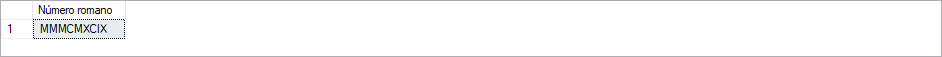

<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ Funciones con valores de tabla insertados</font>**

</td>
</tr>
</table>

Las Funciones con Valores de Tabla Insertados (Inline Table-Valued Functions) son un tipo especial de función definida por el usuario en SQL Server que retornan una tabla.



```
USE Northwind
GO
SELECT
	xtype,
	CASE xtype
		WHEN 'AF' THEN 'Función de agregado (CLR)'
		WHEN 'C' THEN 'Restricción CHECK'
		WHEN 'D' THEN 'Valor predeterminado o restricción DEFAULT'
		WHEN 'F' THEN 'Restricción FOREIGN KEY'
		WHEN 'L' THEN 'Registro'
		WHEN 'FN' THEN 'Función escalar'
		WHEN 'FS' THEN 'Función escalar del ensamblado (CLR)'
		WHEN 'FT' THEN 'Función con valores de tabla de ensamblado (CLR)'
		WHEN 'IF' THEN 'Función de tabla en línea'
		WHEN 'IT' THEN 'Tabla interna'
		WHEN 'P' THEN 'Procedimiento almacenado'
		WHEN 'PC' THEN 'Procedimiento almacenado del ensamblado (CLR)'
		WHEN 'PK' THEN 'Restricción PRIMARY KEY (de tipo K)'
		WHEN 'RF' THEN 'Procedimiento almacenado de filtro de replicación'
		WHEN 'S' THEN 'Tabla del sistema'
		WHEN 'SN' THEN 'Sinónimo'
		WHEN 'SO' THEN 'Secuencia'
		WHEN 'SQ' THEN 'Cola de servicio'
		WHEN 'TA' THEN 'Desencadenador DML del ensamblado (CLR)'
		WHEN 'TF' THEN 'Función de tabla'
		WHEN 'TR' THEN 'Desencadenador DML de SQL'
		WHEN 'TT' THEN 'Tipo de tabla'
		WHEN 'U' THEN 'Tabla de usuario'
		WHEN 'UQ' THEN 'Restricción UNIQUE (de tipo K)'
		WHEN 'V' THEN 'Vista'
		WHEN 'X' THEN 'Procedimiento almacenado extendido'
	END AS Descripción,
	COUNT(*) AS Cantidad
FROM sysobjects
GROUP BY xtype
ORDER BY 3 DESC
```



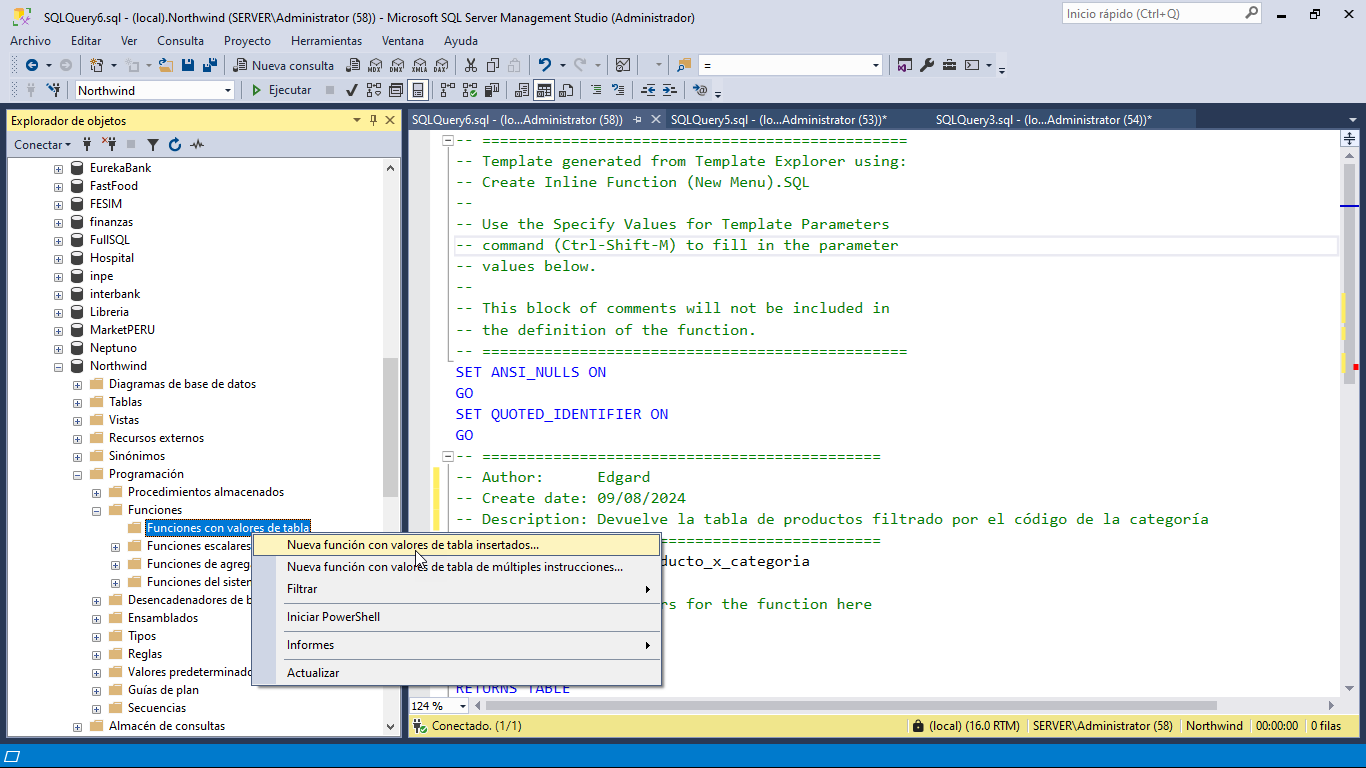

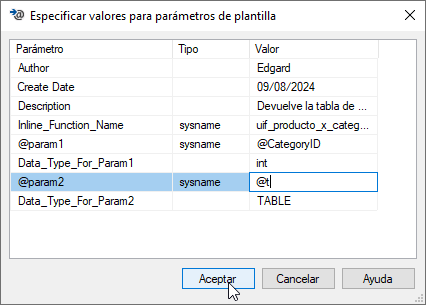



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sysobjects
	WHERE
			xtype = 'IF'
		AND
			name = 'uif_producto_x_categoria '
)
DROP FUNCTION uif_producto_x_categoria
GO
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
-- =============================================
-- Author:		Edgard
-- Create date: 09/08/2024
-- Description:	Devuelve la tabla de productos filtrado por el código de la categoría
-- =============================================
CREATE FUNCTION uif_producto_x_categoria
(
	@CategoryID int
)
RETURNS TABLE
AS
RETURN
(
	SELECT
		[ProductID]
		,[ProductName]
		,dbo.ufn_proveedor([SupplierID]) AS Proveedor
		,dbo.[ufn_categoria]([CategoryID]) AS Categoría
		,[QuantityPerUnit]
		,[UnitPrice]
		,[UnitsInStock]
		,[UnitsOnOrder]
		,[ReorderLevel]
		,[Discontinued]
	FROM [dbo].[Products]
	WHERE CategoryID = @CategoryID
)
GO
SELECT * FROM dbo.uif_producto_x_categoria(1);
GO
```



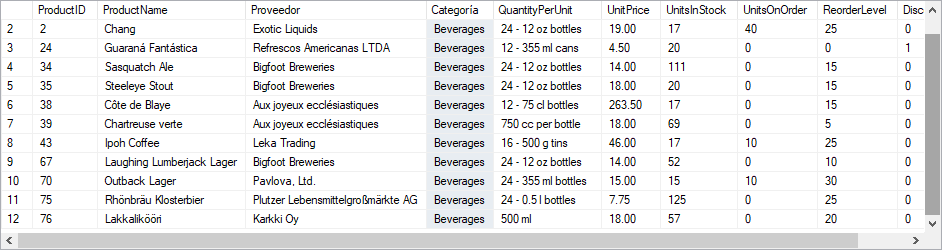

In [ ]:
def num_rom(n):
  m = n // 1000
  n %= 1000

  c = n // 100
  n %= 100

  d = n // 10
  u = n % 10

  M = {1:"M", 2:"MM", 3:"MMM"}
  C = {1:"C", 2:"CC", 3:"CCC", 4:"CD", 5:"D", 6:"DC",7:"DCC", 8:"DCCC", 9:"CM"}
  D = {1:"X", 2:"XX", 3:"XXX", 4:"XL", 5:"L", 6:"LX", 7:"LXX", 8:"LXXX", 9:"XC"}
  U = {1:"I", 2:"II", 3:"III", 4:"IV", 5:"V", 6:"VI", 7:"VII", 8:"VIII", 9:"IX"}

  return M.get(m,'') + C.get(c,'') + D.get(d,'') + U.get(u,'')


print(num_rom(1994))
print(num_rom(1))
print(num_rom(12))
print(num_rom(123))
print(num_rom(1234))
print(num_rom(3999))




MCMXCIV
I
XII
CXXIII
MCCXXXIV
MMMCMXCIX


<table width='99%'>
<tr>
<td bgcolor='#BB2125'>

### **<font color="#FFFFFF"> ◉ Funciones con valores de tabla de múltiples instrucciones</font>**

</td>
</tr>
</table>

Las Funciones con Valores de Tabla de Múltiples Instrucciones (Multi-Statement Table-Valued Functions) son otro tipo de función definida por el usuario en SQL Server que retorna una tabla.

A diferencia de las Funciones con Valores de Tabla Insertados, las Funciones con Valores de Tabla de Múltiples Instrucciones permiten una mayor flexibilidad y complejidad en la lógica de la función.

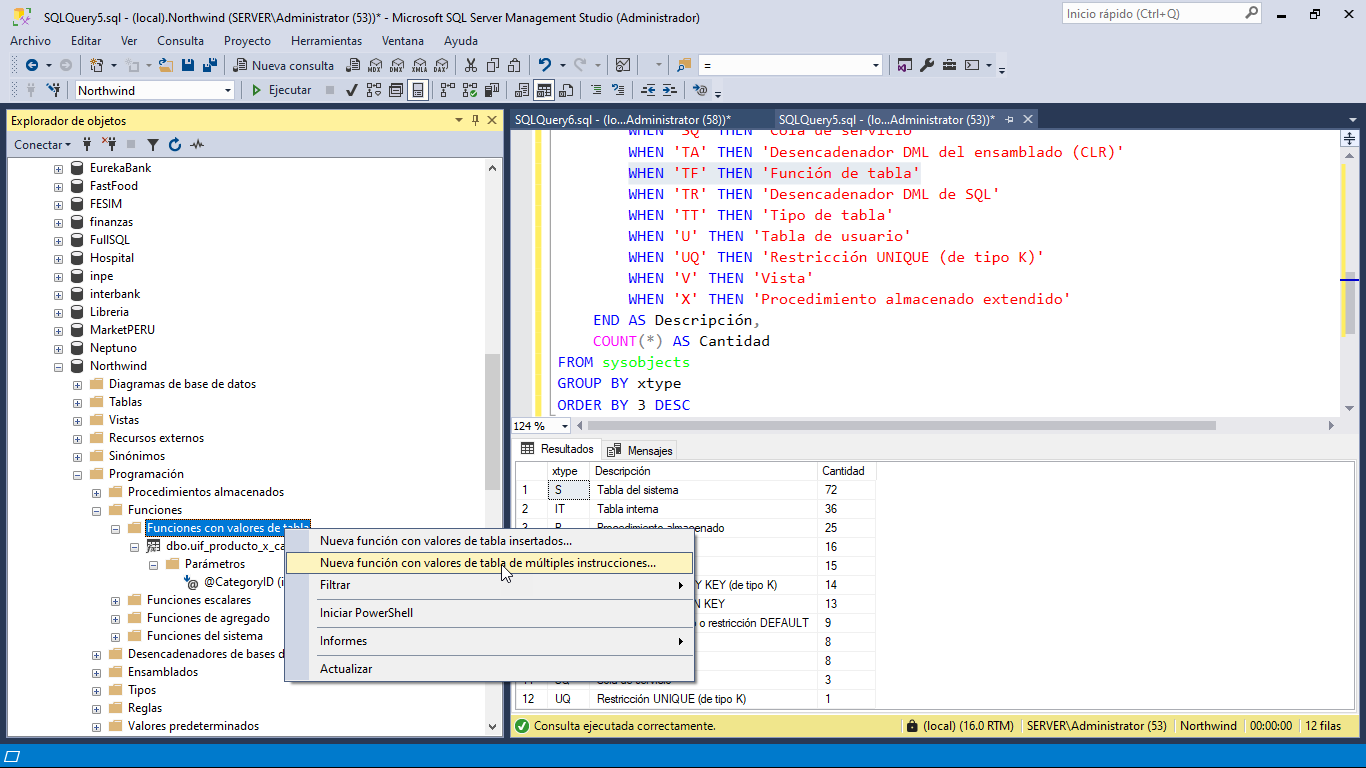



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sysobjects
	WHERE
			xtype = 'tf'
		AND
			name = 'utf_producto_x_categoria '
)
DROP FUNCTION utf_producto_x_categoria
GO
-- ================================================
-- Template generated from Template Explorer using:
-- Create Multi-Statement Function (New Menu).SQL
--
-- Use the Specify Values for Template Parameters
-- command (Ctrl-Shift-M) to fill in the parameter
-- values below.
--
-- This block of comments will not be included in
-- the definition of the function.
-- ================================================
SET ANSI_NULLS ON
GO
SET QUOTED_IDENTIFIER ON
GO
-- =============================================
-- Author:		Edgard Lucho
-- Create date: 09/08/2024
-- Description:	Devuelve la tabla de productos filtrado por el código de la categoría
-- =============================================
CREATE FUNCTION utf_producto_x_categoria
(
	@CategoryID int
)
RETURNS @t TABLE
(
	[ProductID] [int] NOT NULL,
	[ProductName] [nvarchar](40) NOT NULL,
	[Proveedor] [nvarchar](40) NULL,
	[Categoría] [nvarchar](15) NULL,
	[QuantityPerUnit] [nvarchar](20) NULL,
	[UnitPrice] [money] NULL,
	[UnitsInStock] [smallint] NULL,
	[UnitsOnOrder] [smallint] NULL,
	[ReorderLevel] [smallint] NULL,
	[Discontinued] [bit] NOT NULL
)
AS
BEGIN

	INSERT INTO @t
	SELECT
		[ProductID]
		,[ProductName]
		,dbo.ufn_proveedor([SupplierID]) AS Proveedor
		,dbo.[ufn_categoria]([CategoryID]) AS Categoría
		,[QuantityPerUnit]
		,[UnitPrice]
		,[UnitsInStock]
		,[UnitsOnOrder]
		,[ReorderLevel]
		,[Discontinued]
	FROM [dbo].[Products]
	WHERE CategoryID = @CategoryID

	RETURN
END
GO
SELECT * FROM dbo.utf_producto_x_categoria(2);
GO
```



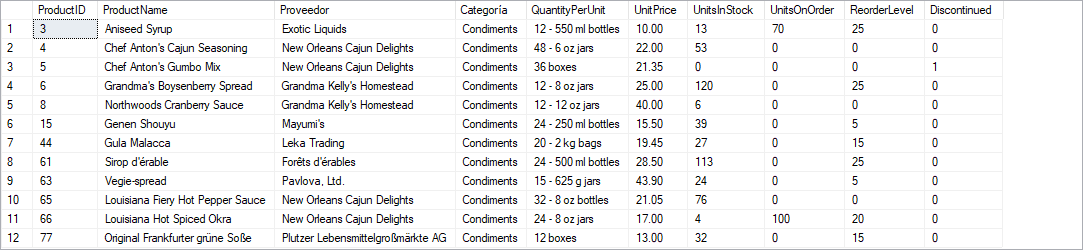